In [ ]:
 !pip install transformers datasets evaluate accelerate rouge_score nltk

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=5e5b82c93af408f948775bbc7a927d619d9464eab27d4d919bc3c2630b61a18b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
import transformers
import datasets
import evaluate
import accelerate
from transformers import pipeline
from datasets import load_dataset
from evaluate import load

In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
! apt install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 25.6 MB/s eta 0:00:00


In [ ]:
model_name = 't5-small'


In [ ]:
samsum_dataset = load_dataset("samsum")
metric = load("rouge")

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
samsum_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [ ]:
samsum_dataset["train"][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [ ]:
train_data = samsum_dataset['train']
test_data = samsum_dataset['test']
valid_data = samsum_dataset['validation']

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_data)
test_df =  pd.DataFrame(test_data)
valid_df = pd.DataFrame(valid_data)

In [ ]:
print("The size of training data",len(train_df))
print("The size of testing data",len(test_df))
print("The size of valid_data",len(valid_df))

The size of training data 14732
The size of testing data 819
The size of valid_data 818


In [ ]:

train_df['dialogue_length'] = train_df['dialogue'].str.len()
train_df['summary_length'] = train_df['summary'].str.len()


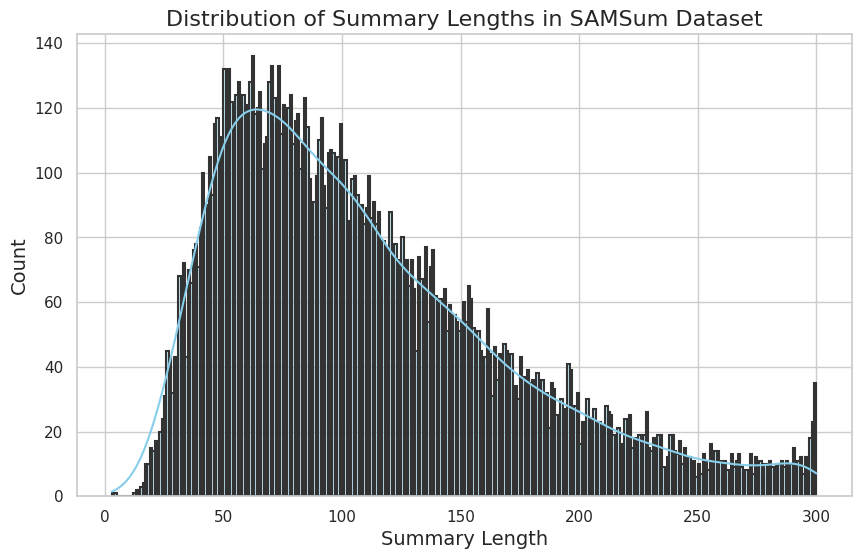

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create the histogram plot with Kernel Density Estimate (KDE)
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.histplot(data=train_df, x="summary_length", kde=True, color="skyblue",
             binwidth=1, edgecolor=".2", linewidth=1.5)

# Add labels and title for clarity
plt.title('Distribution of Summary Lengths in SAMSum Dataset', fontsize=16)
plt.xlabel('Summary Length', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()


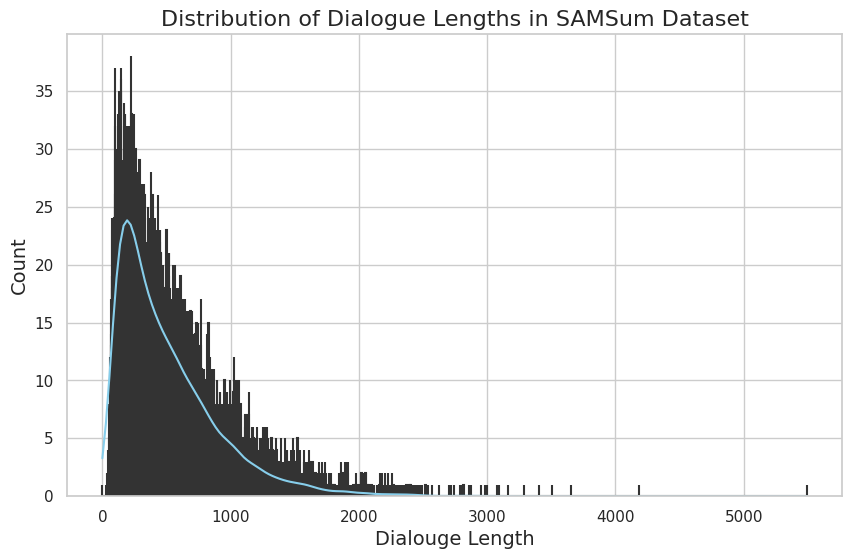

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create the histogram plot with Kernel Density Estimate (KDE)
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.histplot(data=train_df, x="dialogue_length", kde=True, color="skyblue",
             binwidth=1, edgecolor=".2", linewidth=1.5)

# Add labels and title for clarity
plt.title('Distribution of Dialogue Lengths in SAMSum Dataset', fontsize=16)
plt.xlabel('Dialouge Length', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()


In [ ]:
import random
import pandas as pd
from IPython.display import display, HTML

In [ ]:
def random_examples(dataset, num_examples =3):
  assert num_examples<=len(dataset)
  picks = []
  random.seed(42)
  for _ in range(num_examples):
    x = random.randrange(0,len(dataset))
    picks.append(x)
  df = pd.DataFrame(dataset[picks])
  for column, typ in dataset.features.items():
    if isinstance(typ, datasets.ClassLabel):
      df[column] = df[column].transform(lambda i: typ.names[i])
  display(HTML(df.to_html()))

In [ ]:
import random
def rand_queries(num_of_examples):
    random.seed(42)
    examples = list(test_df['dialogue'])
    examples_summary =list(test_df['summary'])
    rand_examples = []
    rand_summaries =[]
    print("Random integers between 0 and : ", len(train_df))
    for i in range(num_of_examples):
        y = random.randrange(len(test_df)-1)
        rand_examples.append(examples[y])
        rand_summaries.append(examples_summary[y])
    return rand_examples,rand_summaries

In [ ]:
from transformers import pipeline

summarizer_distilbart = pipeline("summarization", model="philschmid/distilbart-cnn-12-6-samsum")
summarizer_Falconsai = pipeline("summarization", model="Falconsai/text_summarization")
summarizer_bartlarge = pipeline("summarization", model="facebook/bart-large-cnn")
summarizer_t5_small = pipeline("summarization", model="t5-small")

config.json:   0%|          | 0.00/1.85k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
i=0
rand_examples,rand_summaries = rand_queries(3)
for text in rand_examples:
  print(text,"\n")
  print(f"Given summary {rand_summaries[i]}")
  i+=1
  print(f"text summarizer by facebook bart large cnn {summarizer_bartlarge(text)} \n ")
  print(f"text summarizer by falconsai {summarizer_Falconsai(text)} \n ")
  print(f"text summarizer by distilbart large cnn {summarizer_distilbart(text)} \n ")
  print(f"text summarizer by t5-small {summarizer_t5_small(text)} \n ")

Your max_length is set to 142, but your input_length is only 138. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)


Random integers between 0 and :  14732
Richie: Pogba
Clay: Pogboom
Richie: what a s strike yoh!
Clay: was off the seat the moment he chopped the ball back to his right foot
Richie: me too dude
Clay: hope his form lasts
Richie: This season he's more mature
Clay: Yeah, Jose has his trust in him
Richie: everyone does
Clay: yeah, he really deserved to score after his first 60 minutes
Richie: reward
Clay: yeah man
Richie: cool then 
Clay: cool 

Given summary Richie and Clay saw a very good football game, with one football player chopping the ball back to his foot, which was particularly exciting. Jose has trust in that player. 


Your max_length is set to 200, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


text summarizer by facebook bart large cnn [{'summary_text': 'Richie: "What a s strike yoh!" "I was off the seat the moment he chopped the ball back to his right foot" "He really deserved to score after his first 60 minutes" "This season he\'s more mature," says Richie. "Jose has his trust in him"'}] 
 


Your max_length is set to 142, but your input_length is only 138. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)


text summarizer by falconsai [{'summary_text': 'Pogboom Richie: what a s strike yoh! Clay: was off the seat the moment he chopped the ball back to his right foot Richee: Yeah, Jose has his trust in him . Yeah, everybody does Clay: yeah, yeah, he really deserved to score after his first 60 minutes .'}] 
 


Your max_length is set to 200, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


text summarizer by distilbart large cnn [{'summary_text': "Clay and Richie hope Pogba's form lasts. Pogba is more mature this season. Jose has his trust in Pogba, so he deserved to score after his first 60 minutes. Richie and Clay want Pogba to score a goal for Jose's team. "}] 
 
text summarizer by t5-small [{'summary_text': "Pogboom Richie: what a s strike yoh! Clay: was off the seat the moment he chopped the ball back to his right foot . this season he's more mature Clay: Yeah, everybody does Clay: yeah, yeah, he really deserved to score after his first 60 minutes ."}] 
 
Lincoln: Heeyyy ;* whats up
Fatima: I talked to Jenson, he’s not too happy ;p
Lincoln: the place sucks??
Fatima: No, the place is ok, I think, we can go there, it’s about Alene
Lincoln: typical, dont worry about it
Fatima: He thinks she may have a depression :[
Lincoln: nothin new, everyone has it, she needs a doctor then
Fatima: But she won’t go ;/
Lincoln: so she’s destroying her life fuck it its not your problem

In [ ]:
random_examples(samsum_dataset['train'])

,id,dialogue,summary
0,13820381,"Maria: We've passed the security and we're waiting for the boarding\r\nAldona: no problems?\r\nPhilip: not at all, was smooth\r\nAldona: I told you\r\nMaria: I know, but I am traumatised after the stopped me the last time\r\nMaria: it was so stressful and horrible, quite humiliating\r\nAldona: I know, but it should not happen again\r\nPhilip: She is panicking all the time\r\nPhilip: it would be even funny, if it wasn't so annoying\r\nMaria: I'm sorry, it's kind of a phobia I guess\r\nAldona: no, it will pass, you just had very bad experiences\r\nMaria: maybe you're right\r\nMaria: I feel already better, thanks guys for your support\r\nAldona: 👍",Maria and Philip passed the security and they are waiting for the boarding. Last time she flew Maria was stopped by security guards.
1,13680610,"Filly: wanna go to a concert?\r\nBonnie: whose?\r\nFilly: Mumford and Sons\r\nBonnie: who r they?\r\nFilly: u don't know them?\r\nFilly: they r great!\r\nFilly: listen\r\nFilly: <file_video>\r\nBonnie: ok, they r good\r\nFilly: so will u come?\r\nBonnie: when?\r\nFilly: next sat\r\nBonnie: ok :)\r\nFilly: great :D",Bonnie will go to the Mumford and Sons concert with Filly next Saturday.
2,13862586,"Wayne: Man, have you seen the reviews?\nJoe: Yeah, looks like the movie sucks\nWayne: Yeah... dammit :(","According to the reviews, the movie is not that good."


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [ ]:
prefix = 'summarize'

In [ ]:
samsum_dataset['train'][:2]['dialogue']

["Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: Great']

In [ ]:
max_input_length = 1024
max_target_length = 128

def preprocess_function(examples):
  inputs = [prefix + doc for doc in examples["dialogue"]]
  model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Setup the tokenizer for targets
  labels = tokenizer(text_target=examples["summary"], max_length=max_target_length, truncation=True)

  model_inputs["labels"] = labels["input_ids"]
  return model_inputs

In [ ]:
preprocess_function(samsum_dataset['train'][:2])

{'input_ids': [[21603, 8123, 232, 9, 10, 27, 13635, 5081, 5, 531, 25, 241, 128, 58, 16637, 10, 10625, 55, 21542, 10, 27, 31, 195, 830, 25, 5721, 3, 10, 18, 61, 1], [21603, 667, 40, 11687, 9, 10, 2645, 33, 25, 10601, 21, 16, 48, 4356, 58, 15865, 10, 18587, 7, 38, 373, 5, 25051, 10, 1212, 396, 1603, 15865, 10, 1651, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'labels': [[21542, 13635, 5081, 11, 56, 830, 16637, 128, 5721, 5, 1], [25051, 11, 20373, 5144, 33, 10601, 21, 10215, 7, 16, 48, 4356, 5, 1]]}

In [ ]:
tokenized_datasets = samsum_dataset.map(preprocess_function, batched=True)

In [ ]:
!pip install accelerate

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
import accelerate
model = AutoModelForSeq2SeqLM.from_pretrained(model_name,device_map="auto")

In [ ]:
batch_size = 1
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned-samsum",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    gradient_accumulation_steps=16,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=1,
    predict_with_generate=True,
    fp16=True,
    push_to_hub=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer,model=model)

In [ ]:
import nltk
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)


    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]


    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True, use_aggregator=True)

    result = {key: value * 100 for key, value in result.items()}


    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

In [ ]:
nltk.download('punkt')

In [ ]:
trainer.push_to_hub()

In [ ]:
from transformers import pipeline

summarizer_distilbart = pipeline("summarization", model="philschmid/distilbart-cnn-12-6-samsum")
summarizer_Falconsai = pipeline("summarization", model="Falconsai/text_summarization")
summarizer_bartlarge = pipeline("summarization", model="facebook/bart-large-cnn")
summarizer_vasumathi = pipeline("summarization", model="vasumathin298/t5-small-finetuned-samsum")

In [ ]:
from transformers import pipeline

summarizer_vasumathi = pipeline("summarization", model="vasumathin298/t5-small-finetuned-samsum")

In [ ]:
i=0
rand_examples,rand_summaries = rand_queries(3)
for text in rand_examples:
  print(text,"\n")
  print(f"Given summary {rand_summaries[i]}")
  i+=1
  print(f"text summarizer by vasumathi_pretrained{summarizer_vasumathi(text)} \n ")
  print(f"text summarizer by t5-small large cnn {summarizer_t5_small(text)} \n ")


In [ ]:
from rouge_score import rouge_scorer
# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Function to get the average ROUGE score for a summarizer
def evaluate_summarizer(summarizer, dataset, num_samples=100):
    rouge_scores = {'rouge1': 0, 'rouge2': 0, 'rougeL': 0}
    for i, sample in enumerate(dataset.select(range(num_samples))):
        generated_summary = summarizer(sample['dialogue'],max_length=69)[0]['summary_text']
        reference_summary = sample['summary']

        # Compute ROUGE score
        score = scorer.score(reference_summary, generated_summary)

        # Accumulate scores
        for rouge_type in rouge_scores:
            rouge_scores[rouge_type] += score[rouge_type].fmeasure

    # Average the scores
    for rouge_type in rouge_scores:
        rouge_scores[rouge_type] /= num_samples

    return rouge_scores

# Evaluate all summarizers on the first 100 samples of the dataset
rouge_distilbart = evaluate_summarizer(summarizer_distilbart, test_data, num_samples=20)
rouge_Falconsai = evaluate_summarizer(summarizer_Falconsai, test_data, num_samples=20)
rouge_bartlarge = evaluate_summarizer(summarizer_bartlarge, test_data, num_samples=20)
rouge_vasumathi = evaluate_summarizer(summarizer_vasumathi, test_data, num_samples=20)

# Print the results
print("ROUGE scores for distilbart:", rouge_distilbart)
print("ROUGE scores for Falconsai:", rouge_Falconsai)
print("ROUGE scores for bart-large:", rouge_bartlarge)
print("ROUGE scores for vasumathi:", rouge_vasumathi)

In [ ]:
!pip install rouge_score